# **Genetic Algorithm - Maximization**

In [1]:
#Variables Initialization
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
seed=11
random.seed(seed)
up_limit, low_limit=30, -30

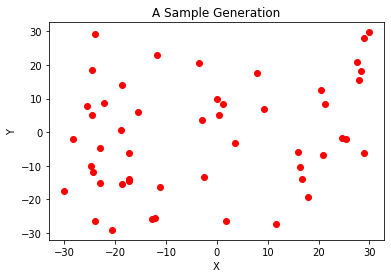

In [2]:
#Population Initialization
# Define the Method to Generate a population by choosing samples
#uniformly at random from the range specified
def gen_sample_population(size, x_limits, y_limits):
    x_low, x_up=x_limits
    y_low, y_up=y_limits
    population=np.zeros((size,2))
    for i in range(size):
        population[i,0]=random.uniform(x_low,
         x_up)
        population[i,1]=random.uniform(y_low,
         y_up)
    return population
# Producing a population
population=gen_sample_population(size=50, 
                x_limits=(low_limit, up_limit), 
                y_limits=(low_limit, up_limit))
# Plot the individual pairs in a sample generation
fig, ax0=plt.subplots(1,1)
ax0.set_title('A Sample Generation')
ax0.set_xlabel('X')
ax0.set_ylabel('Y')
ax0.plot(population[:,0],population[:,1],'ro')

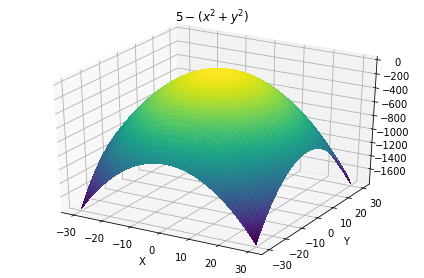

In [3]:
#Fitness Function
# defining the fitness function which is f(x,y)=5 -(x^2 + y^2)
def function(point):
    return (5-(point[0] ** 2+ point[1]** 2))
#plot the fitness function
from mpl_toolkits.mplot3d import Axes3D
n=50
# linspace returns n equally spaced values over the interval low_limit
#to up_limit
x_vals=np.linspace(low_limit, up_limit, n+1)
y_vals=np.linspace(low_limit, up_limit, n+1)
# meshgrid returns the coordinate matrices by combining all the
#combinations of x_vals and y_vals and creates an n*n x and y spaces
x, y=np.meshgrid(x_vals, y_vals)
z=np.zeros_like(x)
# two nested loops to iterate over all 50 * 50 space for x and y values
for i in range(n+1):
    for j in range(n+1):
        z[i,j]=function([x[i,j], y[i,j]])
#Plot the 3D plot
fig=plt.figure()
#adding 3d projection for the plot
ax0=fig.add_subplot(111,projection='3d')
surf=ax0.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis',
linewidth=0, antialiased=False)
#r'' will allow for adding latex code in the title, $$ indicates a latex
#formula
ax0.set_title(r'$5-(x^2+y^2)$')
ax0.set_xlabel('X')
ax0.set_ylabel('Y')
plt.tight_layout()

In [4]:
#Parent Selection: Roulette
# select fit individuals as parents
def roul_choice(sorted_population):
    func_vals=np.array([function(x) for x in sorted_population])
    min_fitness=func_vals[0]
# Make all fitness values positive so probabilities can be calculated
#next
    if min_fitness < 0:
        func_vals += -min_fitness
    fitness_sum=sum(func_vals)
         
# Draw a random variable from uniform distribution
    rand=random.uniform(0, 1)
    acc=0
    for i in range(len(sorted_population)):
        fitness=func_vals[i]
# Probability of each individual being selected is calculated
        prob=fitness/fitness_sum
        acc += prob
        if rand <= acc:
            return sorted_population[i]

In [5]:
#Crossover
def crossover(point_1,point_2):
    return[(point_1[0]+ point_2[0])/2,(point_1[1]+point_2[1])/2]

In [6]:
#Mutation
def mutate(point):
    mute_x=point[0] + random.uniform(-0.5, 0.5)
    mute_y=point[1] + random.uniform(-0.5, 0.5)
# Guarantee to be kept inside boundaries
    mute_x=min(max(mute_x, low_limit), up_limit)
    mute_y=min(max(mute_y, low_limit), up_limit)
    return [mute_x,mute_y]

In [7]:
#Make Next Generation: steps (ii)-(v)
# (ii) Fitness Function used for (iii) Parents selection and then (iv)
#Crossover and (v) Mutation used to Generate next generation
def offspring_generation(curr_population):
    next_generation=np.zeros(np.shape(curr_population))
# Sort items in the previous_population array based on their function
#value
    sorted_population=sorted(curr_population,key=function)
    population_size=len(curr_population)
    for i in range(population_size):
        # (iii) Parent Selection
        first_parent=roul_choice(sorted_population)
        second_parent=roul_choice(sorted_population)
        # Crossover
        offspring=crossover(first_parent, second_parent)
        # Mutation
        offspring=mutate(offspring)
        next_generation[i,:]=offspring
    return next_generation

Generation: 1  Best individual:  [-7.6977572  -2.80751372]
Iteration number:  2
Generation: 2  individual:  [-4.81379627  3.45549699] Improves the optimal value by amount  32.024505256832434
Iteration number:  3
Generation: 3  individual:  [ 0.04756721 -0.93437909] Improves the optimal value by amount  34.237767071729294
Iteration number:  4
Generation: 4  individual:  [-0.278554   -0.29793807] Improves the optimal value by amount  0.7089674896053291
Iteration number:  5
Iteration number:  6
Iteration number:  7
Iteration number:  8
Iteration number:  9
Iteration number:  10
Iteration number:  11
Iteration number:  12
Generation: 12  individual:  [-0.23266337  0.25234095] Improves the optimal value by amount  0.048551231537377504
Iteration number:  13
Iteration number:  14
Iteration number:  15
Iteration number:  16
Generation: 16  individual:  [0.05150034 0.32476834] Improves the optimal value by amount  0.009681440029304156
Iteration number:  17
Iteration number:  18
Generation: 18  

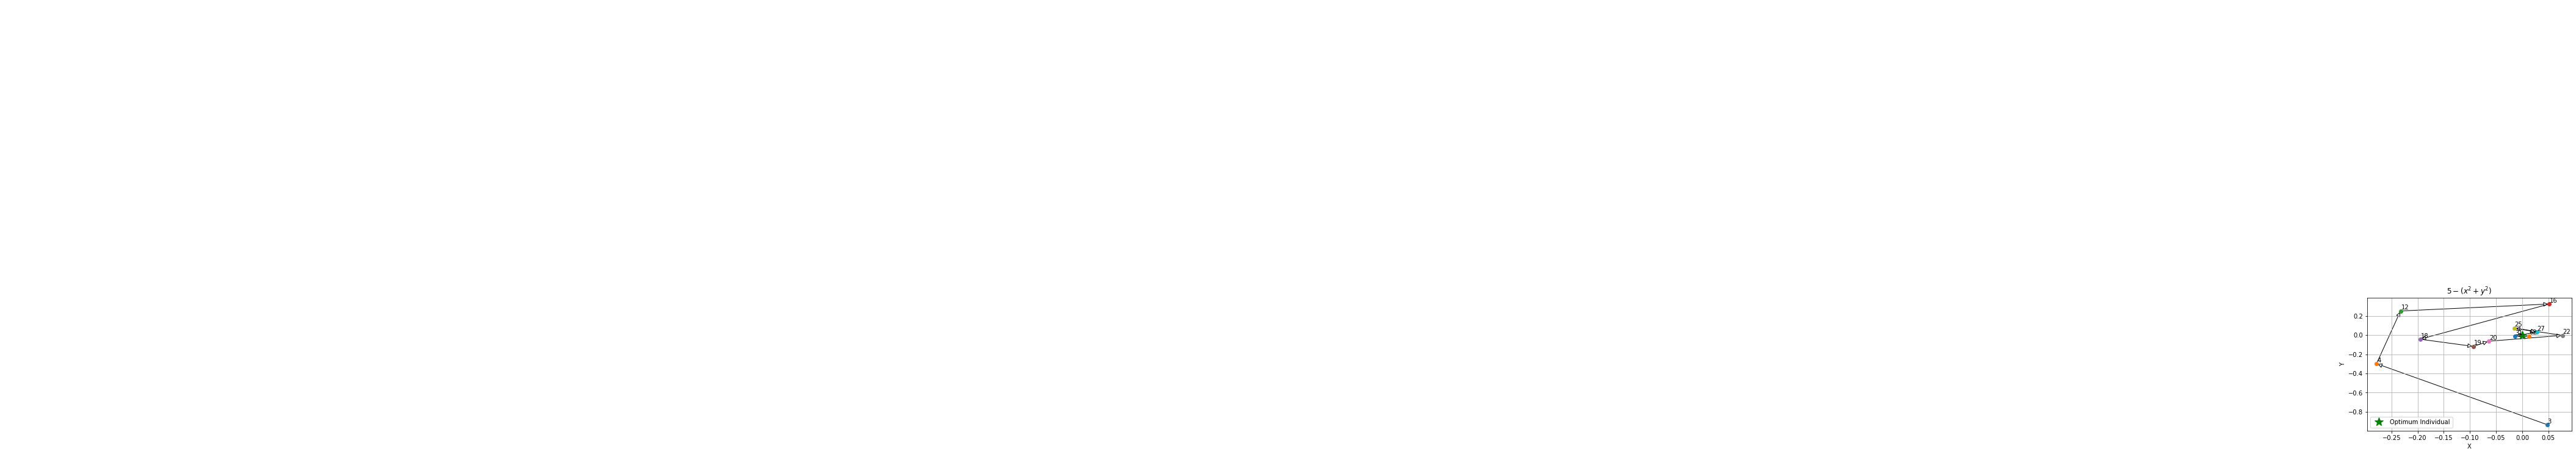

In [8]:
#Genetics Algorithm Workflow
from matplotlib.patches import ConnectionPatch
#Perform the Genetics Algorithm to generate generations and find the
#best individuals in each generation
generations=100
best_val=float('-inf')
best_pair=np.zeros((2))
prev_best_pair=np.zeros_like(best_pair)
best_population=-1
# Threshold for improvement in order to continue the search
threshold=10e-5
stop=False
coordsA="data"
coordsB="data"
fig, ax0=plt.subplots(1,1)
ax0.set_xlabel('X')
ax0.set_ylabel('Y')
ax0.set_title(r'$5-(x^2+y^2)$')
ax0.grid(True)
# Mark the optimum Individuals [0,0] as a star
ax0.plot([0], [0], 'g*', markersize=15, linewidth=0.15,
label='Optimum Individual')
ax0.legend(loc='lower left')
# (i) Population Initialization
population=gen_sample_population(size=50, x_limits=(low_limit,
up_limit), y_limits=(low_limit, up_limit))
# (ii) Fitness Function Calculation
func_vals=np.array([function(x) for x in population])
gen_max_val=max(func_vals)
best_population=1
# Update the best value obtained so far
best_val=gen_max_val
best_pair=population[np.argmax(func_vals),:]
print('Generation:' ,1, ' Best individual: ',best_pair)
# Loop through the number of generations
for i in range(1, generations):
    print("Iteration number: ", i + 1)
# (ii) Fitness Function used for (iii) Parents selection and then (iv)
#Crossover and (v) Mutation used to Generate next generation
    population=offspring_generation(population)
    func_vals=np.array([function(x) for x in population])
    gen_max_val=max(func_vals)
# check if this generation maximum value (gen_max_val) is better than
#our best value (best_val) found thus far.
    if (gen_max_val > best_val):
        diff=abs(gen_max_val - best_val)
# If the improvement amount (diff) is less than threshold set
#stop=True => Break the loop, otherwise continue the search
        stop=True if diff < threshold else False
        best_population=i + 1
# Update the best value obtained so far
        best_val=gen_max_val
        prev_best_pair=np.copy(best_pair)
        best_pair=population[np.argmax(func_vals),:]
        print('Generation:' ,i + 1, ' individual: ',best_pair,
        'Improves the optimal value by amount ', diff )
# If it is after iteration 1 plot the arrow to show the evolution to the
#new best_pair
        if(i > 1):
# plots the best_pair as points with 'o' marker on the plot
            ax0.plot([best_pair[0]],[best_pair[1]], 'o')
# Mark each best_pair point with its iteration number (i + 1)
            ax0.text(best_pair[0] + 0.001 ,
            best_pair[1]+ 0.015 ,'{}'.format(i + 1))
# Create the arrow from prev_best_point to best_point to show the
#evolution to the new individual (best_pair)
            con=ConnectionPatch(prev_best_pair,
            best_pair, coordsA=coordsA, coordsB=coordsB,
            arrowstyle="-|>", shrinkA=2, shrinkB=2,
            mutation_scale=15, fc="w")
            ax0.add_artist(con)
        if (stop):
            break
# Print the final best individuals
print('Final Result is from iteration: ',best_population, 
' for coordinates: ', best_pair , ' best value: ', best_val)